# 淘宝用户行为分析

## 阶段一: 明确业务问题&分析目标&分析思路

数据集：淘宝用户行为（通常包含 user_id, item_id, category_id, behavior_type, timestamp 等字段）

🔗 数据来源：https://tianchi.aliyun.com/dataset/649

📔数据描述：本数据集包含了2017年11月25日至2017年12月3日之间，有行为的约一百万随机用户的所有行为（行为包括点击、购买、加购、喜欢）。数据集的组织形式和MovieLens-20M类似，即数据集的每一行表示一条用户行为，由用户ID、商品ID、商品类目ID、行为类型和时间戳组成，并以逗号分隔。关于数据集中每一列的详细描述如下

**业务背景**：本项目基于阿里巴巴开源的淘宝用户行为数据集，模拟电商平台的用户行为分析，目标是理解用户在电商平台的行为模式（浏览、点击、加购、购买），并提出优化用户转化和留存的可行性建议。

## 阶段二：理解数据 & 数据清洗

### 字段理解

1. 用户ID（user_id）：整数类型
2. 商品ID（item_id）：整数类型
3. 商品类目ID（item_category）：整数类型
4. 行为类型（behavior_type）：字符串，枚举类型，包括（`pv`, `buy`,`cart`,`fav`）
5. 时间戳（timestamp）：行为发生的时间戳

**行为类型**：
1. `pv`：商品详情页pv，等价于点击
2. `fav`：收藏商品
3. `cart`：将商品加入购物车
4. `buy`：商品购买


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from data_analysis import user_behavior
%matplotlib inline

taobao = pd.read_csv('data/users_sample.csv')
taobao.head()

,user_id,item_id,item_category,behavior_type,timestamp,time,date,weekday,hour
0,1000061,1288773,1735195,pv,1511576626,2017-11-25 10:23:46,2017-11-25,5,10
1,1000061,4074215,4684862,pv,1511677113,2017-11-26 14:18:33,2017-11-26,6,14
2,1000061,1120968,512076,pv,1511685194,2017-11-26 16:33:14,2017-11-26,6,16
3,1000061,4862918,3164550,cart,1511686985,2017-11-26 17:03:05,2017-11-26,6,17
4,1000061,3150019,3164550,cart,1511687015,2017-11-26 17:03:35,2017-11-26,6,17


In [15]:
taobao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001721 entries, 0 to 1001720
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   user_id        1001721 non-null  int64 
 1   item_id        1001721 non-null  int64 
 2   item_category  1001721 non-null  int64 
 3   behavior_type  1001721 non-null  object
 4   timestamp      1001721 non-null  int64 
 5   time           1001721 non-null  object
 6   date           1001721 non-null  object
 7   weekday        1001721 non-null  int64 
 8   hour           1001721 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 68.8+ MB


In [16]:
taobao.describe()

,user_id,item_id,item_category,timestamp,weekday,hour
count,1.001721e+06,1.001721e+06,1.001721e+06,1.001721e+06,1.001721e+06,1.001721e+06
mean,5.083127e+05,2.577860e+06,2.702917e+06,1.511961e+09,3.720556e+00,1.486545e+01
std,2.932676e+05,1.488418e+06,1.463172e+06,2.301460e+05,2.038137e+00,6.155967e+00
min,7.300000e+01,1.900000e+01,2.171000e+03,1.511539e+09,0.000000e+00,0.000000e+00
25%,2.568420e+05,1.294284e+06,1.320530e+06,1.511762e+09,2.000000e+00,1.100000e+01
50%,5.100180e+05,2.577764e+06,2.693696e+06,1.511965e+09,4.000000e+00,1.600000e+01
75%,7.574280e+05,3.862038e+06,4.145813e+06,1.512178e+09,5.000000e+00,2.000000e+01
max,1.017941e+06,5.163067e+06,5.161669e+06,1.512317e+09,6.000000e+00,2.300000e+01


In [17]:
print("数据及大小:", taobao.shape)

数据及大小: (1001721, 9)


### 数据清洗

**清洗的步骤**：
1. 导入数据
2. 查看数据结构
3. 缺失值检查——补缺/去除缺失值
4. 重复值检查——去重
5. 异常值检查
6. 数据类型转换 —— data transformation
7. 创建新字段

In [18]:
# 检查缺失值
print("缺失值情况:")
print(taobao.isnull().sum())

缺失值情况:
user_id          0
item_id          0
item_category    0
behavior_type    0
timestamp        0
time             0
date             0
weekday          0
hour             0
dtype: int64


In [19]:
# 检查重复值
print("检查重复值:")
print(taobao.duplicated(keep='first').sum())

检查重复值:
0


In [20]:
# 去重
taobao.drop_duplicates(inplace=True)

In [22]:
# 转换数据类型——时间戳
# taobao['time'] = pd.to_datetime(taobao['timestamp'], unit='s')
taobao['time'] = pd.to_datetime(taobao['timestamp'], unit='s', utc=True).dt.tz_convert('Asia/Shanghai').dt.tz_localize(None)
taobao['date'] = taobao['time'].dt.date
taobao['hour'] = taobao['time'].dt.hour
taobao['weekday'] = taobao['time'].dt.day_name()
taobao.head()

,user_id,item_id,item_category,behavior_type,timestamp,time,date,weekday,hour
0,1000061,1288773,1735195,pv,1511576626,2017-11-25 10:23:46,2017-11-25,Saturday,10
1,1000061,4074215,4684862,pv,1511677113,2017-11-26 14:18:33,2017-11-26,Sunday,14
2,1000061,1120968,512076,pv,1511685194,2017-11-26 16:33:14,2017-11-26,Sunday,16
3,1000061,4862918,3164550,cart,1511686985,2017-11-26 17:03:05,2017-11-26,Sunday,17
4,1000061,3150019,3164550,cart,1511687015,2017-11-26 17:03:35,2017-11-26,Sunday,17


In [23]:
taobao[taobao['timestamp']==1512290381]['time']

464656   2017-12-03 16:39:41
540621   2017-12-03 16:39:41
659358   2017-12-03 16:39:41
722481   2017-12-03 16:39:41
949946   2017-12-03 16:39:41
Name: time, dtype: datetime64[ns]

In [24]:
# 检查日期范围
min_date = taobao['time'].min()
max_date = taobao['time'].max()
print(f"日期范围: {min_date} - {max_date}")

日期范围: 2017-11-25 00:00:00 - 2017-12-03 23:59:57


In [25]:
# 筛选出指定日期的范围，过滤异常值
import datetime
start_day = datetime.date(2017,11,25)
end_day = datetime.date(2017,12,3)
print(taobao[(taobao['date']>=start_day)&(taobao['date']<=end_day)].shape[0])

1001721


In [26]:
# 筛选出所有在日期范围内的数据
taobao = taobao[(taobao['date']>=start_day)&(taobao['date']<=end_day)]

In [27]:
print(f"数据集跨度时间：{(max_date-min_date).days+1}天")

数据集跨度时间：9天


## 阶段三：探索性数据分析（EDA）

角度：
- 用户数据
    - 新增用户
    - 留存用户
    - 活跃用户
- 行为数据
    - PV/UV
    - 转发率
    - 转化率
    - K因子
- 产品数据
    - 业务总量：成交总额（GMV），成交总量，访问时长
    - 人均付费：客单价，付费人群人均付费，人均访问时长
    - 付费：付费率，复购率，回购率

分析目标：
1. 数据整体结构：用户数、商品数、行为数分布情况
2.	行为特征分析：pv/cart/fav/buy 占比、趋势
3.	时间规律分析：按天、小时的活跃度
4.	用户维度探索：活跃用户数、行为次数分布
5.	商品维度探索：Top 热门商品/类别

### 数据分布情况

In [28]:
total_user = taobao['user_id'].nunique()
print(f"总用户数:{total_user}")

total_items = taobao['item_id'].nunique()
print(f"总商品数:{total_items}")

total_categories = taobao['item_category'].nunique()
print(f"总类别数:{total_categories}")

总用户数:9879
总商品数:402586
总类别数:5852


In [29]:
# 行为分布
behaviors = taobao.groupby('behavior_type')['behavior_type'].count().reset_index(name='counts')
behaviors['fraction'] = round(behaviors['counts']/behaviors['counts'].sum(),3)
behaviors

,behavior_type,counts,fraction
0,buy,19796,0.020
1,cart,54241,0.054
2,fav,29581,0.030
3,pv,898103,0.897


Text(0, 0.5, 'Count')

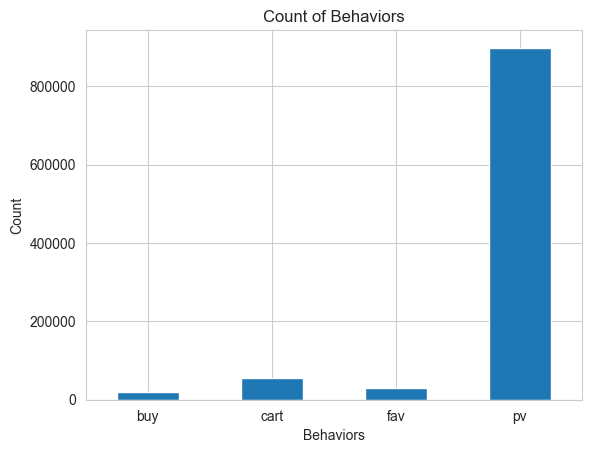

In [30]:
# 行为分布条形图
fig, ax = plt.subplots()
behaviors.plot.bar(x='behavior_type', y='counts', rot=0, ax=ax, legend=False)
ax.set_title('Count of Behaviors')
ax.set_xlabel('Behaviors')
ax.set_ylabel('Count')

<Axes: ylabel='Density'>

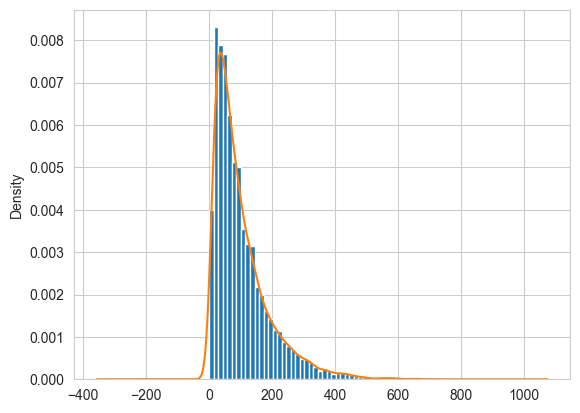

In [31]:
# 用户行为次数分布
user_beh_count = taobao['user_id'].value_counts().reset_index()
ax = user_beh_count['count'].plot.hist(density=True,bins=50)
user_beh_count['count'].plot.density(ax=ax)

### 时间规律分析

计算每天的活跃度、每小时活跃度

活跃度：只要用户登录——有行为数据，表示有活跃

In [32]:
# 每天的活跃用户数
daily_user = taobao.groupby('date')['user_id'].nunique().reset_index(name='active')
daily_user

,date,active
0,2017-11-25,7049
1,2017-11-26,7093
2,2017-11-27,7080
3,2017-11-28,7096
4,2017-11-29,7155
5,2017-11-30,7275
6,2017-12-01,7357
7,2017-12-02,9694
8,2017-12-03,9670


Text(0, 0.5, '活跃用户数')

<Figure size 1000x600 with 0 Axes>

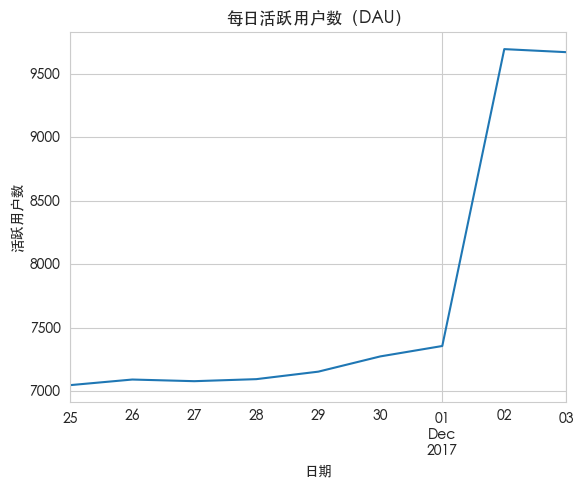

In [33]:
plt.rcParams['font.family'] = 'Heiti TC'
daily_user['date'] = pd.to_datetime(daily_user['date'], format="%Y-%m-%d")
plt.figure(figsize=(10,6))
daily_user.plot(x='date', y='active',legend=False)
plt.title('每日活跃用户数（DAU）')
plt.xlabel('日期')
plt.ylabel('活跃用户数')

In [34]:
# 查看日期对应的星期名
daily_user['weekday'] = daily_user['date'].dt.day_name()

从上表可以发现，这9天内包含两个星期日两个星期六，但是到了12-02，用户活跃度却激增，我们可以计算，本周六日对比上周六日活跃用户增长率

In [35]:
last_weekend = daily_user[(daily_user['date']=='2017-11-25')|(daily_user['date']=='2017-11-26')]['active'].sum()
this_weekend = daily_user[(daily_user['date']=='2017-12-02')|(daily_user['date']=='2017-12-03')]['active'].sum()
weekend_ratio_increase = 100*(this_weekend - last_weekend)/last_weekend
print(f"休息日活跃用户数增长了{weekend_ratio_increase:.2f}%")

休息日活跃用户数增长了36.93%


<Axes: xlabel='date', ylabel='hour'>

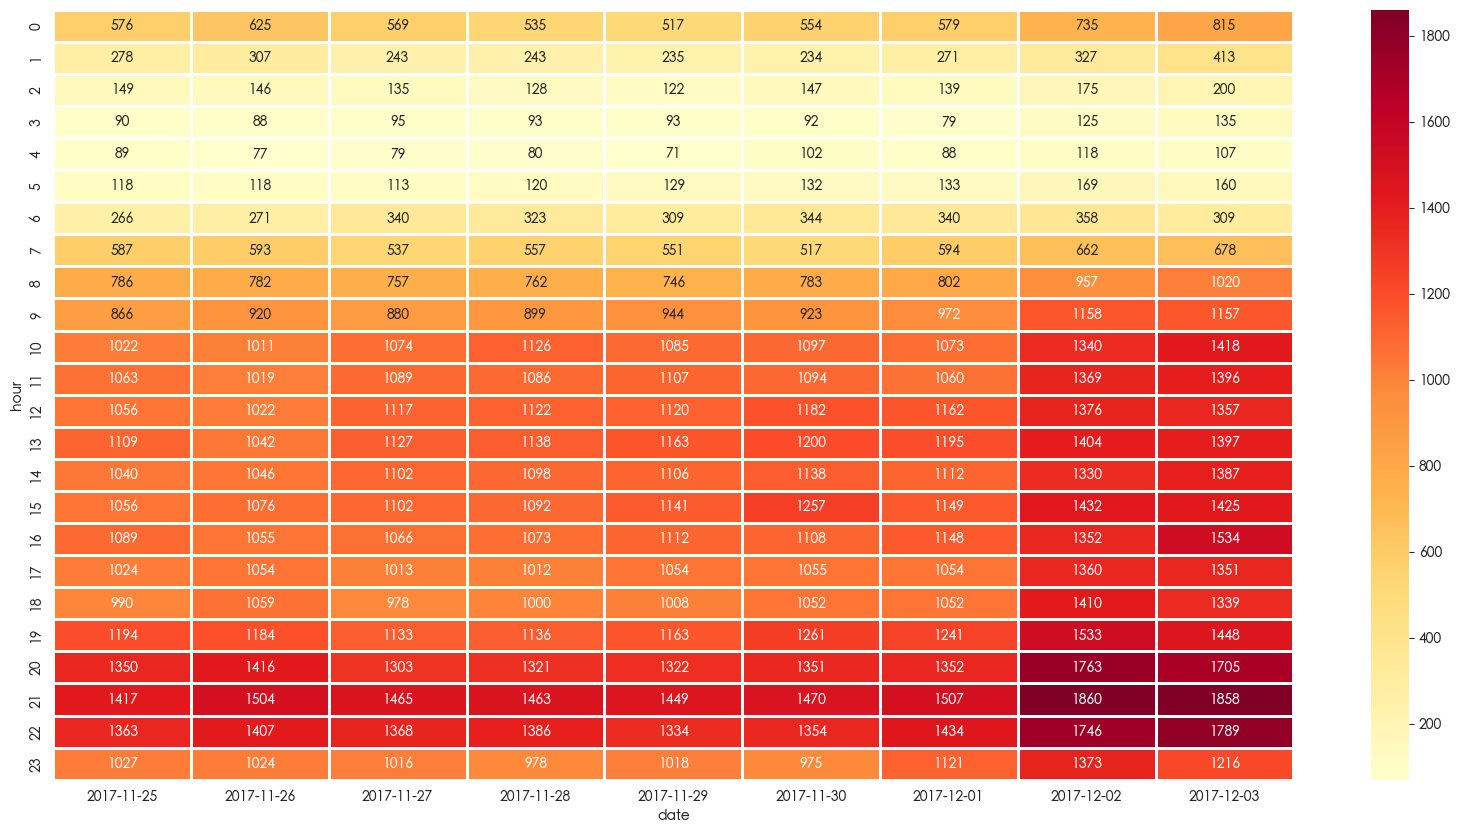

In [36]:
# 每天每小时的活跃用户数
active_hour = taobao.pivot_table(index='hour', columns='date', values='user_id', aggfunc='nunique', fill_value=0)
plt.figure(figsize=(20,10))
sns.heatmap(active_hour, cmap='YlOrRd', annot=True, fmt='d' ,linewidths=1)


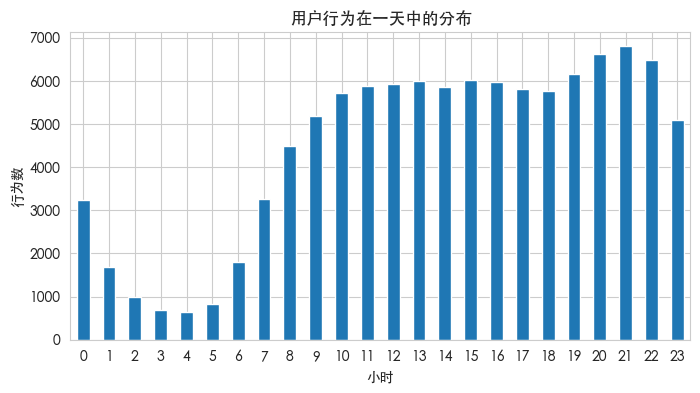

In [37]:
# 每小时的活跃用户数
hourly_actions = taobao.groupby('hour')['user_id'].nunique()
plt.rcParams['font.family'] = 'Heiti TC'
plt.figure(figsize=(8,4))
hourly_actions.plot.bar(rot=0)
plt.title('用户行为在一天中的分布')
plt.xlabel('小时')
plt.ylabel('行为数')
plt.show()

<Axes: xlabel='date', ylabel='hour'>

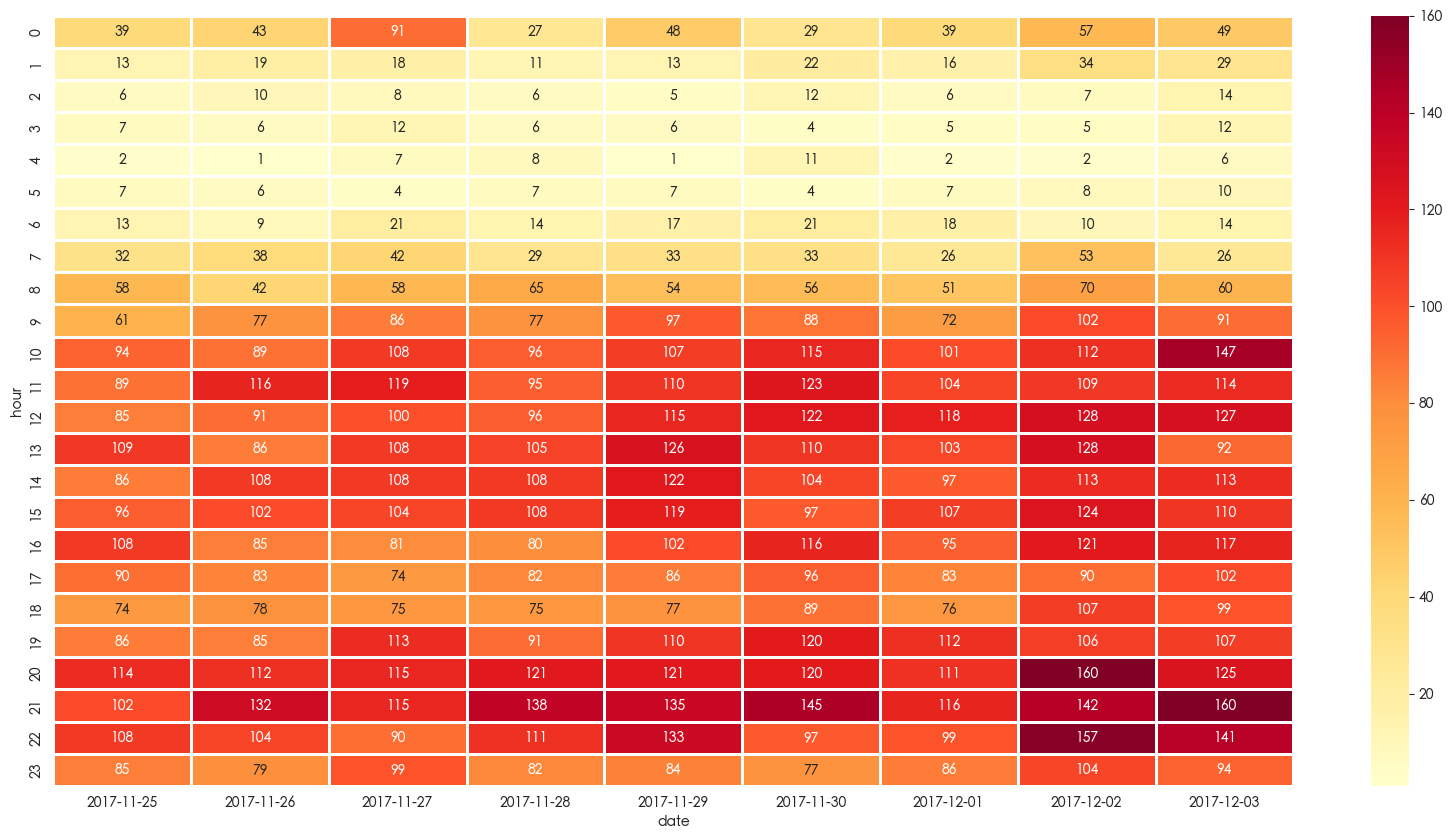

In [38]:
active_buy_hour = taobao[taobao['behavior_type']=='buy'].pivot_table(index='hour', columns='date', values='user_id', aggfunc='nunique', fill_value=0)
plt.figure(figsize=(20,10))
sns.heatmap(active_buy_hour, cmap='YlOrRd', annot=True, fmt='d' ,linewidths=1)


### 产品数据探索

找到Top热门商品/类别——热门产品Top10

1. 流量热度
2. 销量热度
3. 综合热度

In [39]:
# 产品热度
heat_score = {'pv':1, 'fav':3, 'cart':5, 'buy':10}

# 流量热度
pv_top10 = taobao[taobao['behavior_type']=='pv']['item_id'].value_counts().reset_index()

# 销量热度
sale_top10= taobao[taobao['behavior_type']=='buy']['item_id'].value_counts().reset_index()

# 综合热度
taobao['score_heat'] = taobao['behavior_type'].map(heat_score)
heat_top10_item = taobao.groupby('item_id')['score_heat'].sum().reset_index().sort_values(by='score_heat', ascending=False).reset_index(drop=True)

# 综合表
items_top10 = pd.concat([pv_top10.head(10), sale_top10.head(10), heat_top10_item.head(10)], axis=1, keys=['pv_top10','sale_top10','heat_top10_item'])


items_top10

pv_top10       sale_top10       heat_top10_item           
   item_id count    item_id count         item_id score_heat
0   812879   300    3122135    15          812879        422
1  3845720   267    1116492     9         3845720        384
2   138964   238    2964774     8         3031354        344
3  2331370   216    4489811     8          138964        339
4  1535294   186    2560262     8         2331370        319
5  2032668   185    1589561     8         1535294        307
6   987143   178    4011044     8         2338453        263
7  4211339   177    4401268     8         2279428        256
8  2338453   175    1910706     7         2818406        255
9  3031354   172    1344014     7         2032668        249

In [40]:
# 产品类别数目

# 流量热度
pv_cat_top10 = taobao[taobao['behavior_type']=='pv']['item_category'].value_counts().reset_index()

# 销量热度
sale_cat_top10 = taobao[taobao['behavior_type']=='buy']['item_category'].value_counts().reset_index()

# 综合热度
heat_top10_cat = taobao.groupby('item_category')['score_heat'].sum().reset_index().sort_values(by='score_heat', ascending=False).reset_index(drop=True)

cat_top10 = pd.concat([pv_cat_top10.head(10), sale_cat_top10.head(10), heat_top10_cat.head(10)], axis=1, keys=['cat_pv_top10','cat_sale_top10','heat_top10_cat'])
cat_top10

cat_pv_top10        cat_sale_top10       heat_top10_cat           
  item_category  count  item_category count  item_category score_heat
0       4756105  44207        2735466   328        4756105      61272
1       4145813  32147        1464116   323        4145813      46990
2       2355072  30854        2885642   303        2355072      40451
3       3607361  29427        4145813   302         982926      40169
4        982926  27854        4756105   285        3607361      38163
5       2520377  19807         982926   254        4801426      29170
6       4801426  19177        4801426   226        2520377      26044
7       1320293  17796        2640118   212        1320293      25426
8       2465336  14923        3002561   184        2465336      21941
9       3002561  13389        4357323   184        3002561      20452

综合热度：可以设置权重
1. 经验法 ✅ —— pv =1, fav=3, cart=5, buy=10
2. 数据驱动法——转化率倒数 ❓
3. 模型学习法

In [41]:
# 计算综合热度top10产品所占的总的行为次数
top10_behavior_count = taobao[taobao['item_id'].isin(items_top10['heat_top10_item']['item_id'])]['behavior_type'].count()
top10_ratio = 100*top10_behavior_count/taobao.shape[0]
print(f"Top10 商品占据了{top10_ratio:.3f}%的总行为数")

Top10 商品占据了0.227%的总行为数


## 阶段四：核心业务分析

转化漏洞+用户画像/分层

### 转化漏斗分析

目标：分析用户从浏览-> 收藏/加购 -> 购买 的转化情况， 找到流失最多的环节

**方法一**：粗略计算

- 思路：

    - 按行为类型依次筛选用户集合，用 user_id.nunique() 做去重。
- 优点：
    - 清晰、逻辑直观。
    - 回答“浏览后多少人收藏/加购，再多少人购买”等问题。
- 缺点：
    - 路径信息丢失：比如无法区分「浏览→直接购买」和「浏览→收藏→购买」。
    - 如果你想分析「无浏览直接收藏→购买」的用户群，这种写法就难以扩展。

👉 适合 做大盘用户行为转化率，但不够灵活。

In [42]:
# 计算浏览的人数
pv_users = taobao[taobao['behavior_type']=='pv'][['user_id']]
pv_users_count = taobao[taobao['behavior_type']=='pv']['user_id'].nunique()

# 所有收藏/加购的人数
fav_cart_user = taobao[taobao['behavior_type'].isin(['fav','cart'])][['user_id']]

# 浏览后，收藏加购的人数 - 浏览 -> 收藏加购
pv_fav_cart_user = fav_cart_user[fav_cart_user['user_id'].isin(pv_users['user_id'])][['user_id']]
pv_fav_cart_user_count = pv_fav_cart_user['user_id'].nunique()

# 所有购买的人数
buy_users = taobao[taobao['behavior_type']=='buy'][['user_id']]

# 浏览- 收藏加购后，购买的人数 - 浏览 -> 收藏加购 -> 购买
pv_favcart_buy_user = buy_users[buy_users['user_id'].isin(pv_fav_cart_user['user_id'])][['user_id']]
pv_favcart_buy_user_count = pv_favcart_buy_user['user_id'].nunique()

# 浏览后直接购买的人数（无收藏加购）—— 浏览-> 购买
pv_buy_user = buy_users[buy_users['user_id'].isin(pv_users['user_id'])][['user_id']]

# ----- 计算转化率-------
# 浏览->收藏加购转化率
rate_pv_favcart = 100*pv_fav_cart_user_count/pv_users_count
# 浏览收藏加购-> 购买转化率
rate_pv_favcart_buy = 100*pv_favcart_buy_user_count/pv_fav_cart_user_count
# 整体转化率 - 所有浏览后购买人数（包含收藏加购）/所有浏览人数
rate_pv_buy = 100*pv_buy_user['user_id'].nunique()/pv_users_count

print(f"浏览->收藏/加购 转化率: {rate_pv_favcart:.2f}%")
print(f"浏览收藏加购->购买 转化率: {rate_pv_favcart_buy:.2f}%")
print(f"整体转化率:{rate_pv_buy:.2f}%")

浏览->收藏/加购 转化率: 86.86%
浏览收藏加购->购买 转化率: 69.88%
整体转化率:67.88%


**方法二**：构造行为路径（user_id, item_id 粒度）

In [87]:
user_behavior = taobao[['user_id','item_id','behavior_type']]
user_behavior['flag'] = 1
users = user_behavior.pivot_table(index=['user_id','item_id'], columns='behavior_type', values='flag', aggfunc='max').fillna(0).reset_index()
users[['buy','cart','fav','pv']] = users[['buy','cart','fav','pv']].astype(int)
users = users.rename(columns={col: col+"_cnt" for col in ['pv','cart','fav','buy']})
users.head(5)

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_43933/2950614984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_behavior['flag'] = 1


behavior_type,user_id,item_id,buy_cnt,cart_cnt,fav_cnt,pv_cnt
0,73,3955,0,0,0,1
1,73,8046,0,0,0,1
2,73,14196,0,0,0,1
3,73,48873,0,0,0,1
4,73,88837,0,0,0,1


In [88]:
users['user_behavior_path'] = users.apply(lambda x: ''.join(x[['pv_cnt','fav_cnt','cart_cnt','buy_cnt']].astype(str)),axis=1)
users.head()

behavior_type,user_id,item_id,buy_cnt,cart_cnt,fav_cnt,pv_cnt,user_behavior_path
0,73,3955,0,0,0,1,1000
1,73,8046,0,0,0,1,1000
2,73,14196,0,0,0,1,1000
3,73,48873,0,0,0,1,1000
4,73,88837,0,0,0,1,1000


In [45]:
# 浏览 - 收藏/加购 - 购买 行为路径转化率
# 漏斗第一层：浏览的用户数量
pvs = users[users['pv_cnt']==1]['user_id'].nunique()
print(f"浏览的用户数量:{pvs:.2f}")

# 漏斗第二层：浏览后收藏或加购的用户数量
fav_cart_user = users[(users['pv_cnt']==1)&((users['fav_cnt']==1)|(users['cart_cnt']==1))]['user_id'].nunique()
print(f"浏览后收藏或加购物车的用户数量:{fav_cart_user:.2f}")

# 漏斗第三层：浏览-收藏/加购-最后购买的用户数量
buys = users[users['user_behavior_path'].isin(['1101','1111','1011'])]['user_id'].nunique()
print(f"最后购买的用户数量:{buys:.2f}")

pv_fav_cart_con = 100*fav_cart_user/pvs
pv_favcart_buy_con = 100*buys/fav_cart_user

print(f"浏览->收藏/加购 转化率: {pv_fav_cart_con:.2f}%")
print(f"浏览收藏加购->购买 转化率: {pv_favcart_buy_con:.2f}%")

# 浏览->购买的转化率（包含收藏加购）
all_buys_from_pv = users[users['user_behavior_path'].isin(['1101','1111','1011','1001'])]['user_id'].nunique()
buys_from_pv_rate = 100*all_buys_from_pv/pvs
print(f"浏览->购买 转化率:{buys_from_pv_rate:.2f}%")

# 收藏加购->购买的转化率(包含浏览和无浏览)
all_buys_from_favcart = users[(users['buy_cnt']==1)&((users['fav_cnt']==1)|(users['cart_cnt']==1))]['user_id'].nunique()
all_favcart = users[(users['fav_cnt']==1)|(users['cart_cnt']==1)]['user_id'].nunique()
buys_from_favcart = 100*all_buys_from_favcart/all_favcart
print(f"收藏加购->购买 转化率:{buys_from_favcart:.2f}%")

# 浏览后直接购买的比例
buys_without_favcart = users[users['user_behavior_path']=='1001']['user_id'].nunique()
direct_buy_pv = 100*buys_without_favcart/pvs
print(f"浏览->购买(直购): {direct_buy_pv:.2f}%")

# 无浏览，直接收藏加购->购买 比例：
buys_without_pv = users[users['user_behavior_path'].isin(['0101','0111','0011'])]['user_id'].nunique()
favcart_without_pv = users[((users['fav_cnt']==1)|(users['cart_cnt']==1))&(users['pv_cnt']==0)]['user_id'].nunique()
direct_cart_buy = 100*buys_without_pv/favcart_without_pv
print(f"直接收藏加购->购买: {direct_cart_buy:.2f}%")

# 该时间段内，没有浏览/收藏/加购，直接购买的用户比例
direct_buys = users[users['user_behavior_path']=='0001']['user_id'].nunique()
all_buy_users = users[users['buy_cnt']==1]['user_id'].nunique()
direct_buy_rate = 100*direct_buys/all_buy_users
print(f"所有购买过商品的用户中，无浏览/收藏/加购，直接购买的用户:{direct_buy_rate:.2f}%")

浏览的用户数量:9831.00
浏览后收藏或加购物车的用户数量:7369.00
最后购买的用户数量:2360.00
浏览->收藏/加购 转化率: 74.96%
浏览收藏加购->购买 转化率: 32.03%
浏览->购买 转化率:55.45%
收藏加购->购买 转化率:33.60%
浏览->购买(直购): 46.30%
直接收藏加购->购买: 10.89%
所有购买过商品的用户中，无浏览/收藏/加购，直接购买的用户:46.93%


### 用户分层分析（RFM模型）

**目标**：识别高价值用户、中低价值用户，进行用户画像。

In [46]:
# 创建RF表格
all_rebuys = taobao[taobao['behavior_type']=='buy']
all_rebuys.head()

,user_id,item_id,item_category,behavior_type,timestamp,time,date,weekday,hour,score_heat
5,1000061,1120968,512076,buy,1511705473,2017-11-26 22:11:13,2017-11-26,Sunday,22,10
32,1000061,1388090,4134062,buy,1512310380,2017-12-03 22:13:00,2017-12-03,Sunday,22,10
39,1000061,3085401,2885642,buy,1512312173,2017-12-03 22:42:53,2017-12-03,Sunday,22,10
171,1000872,4352733,1567637,buy,1511819765,2017-11-28 05:56:05,2017-11-28,Tuesday,5,10
172,1000872,561560,2464463,buy,1511894752,2017-11-29 02:45:52,2017-11-29,Wednesday,2,10


In [47]:
rf = all_rebuys.groupby('user_id').agg(
    recency = ('date', 'max'),
    frequency = ('date', 'count')
).reset_index()


rf['recency'] = pd.to_datetime(rf['recency'])           # 关键：把 datetime.date 转回 datetime64[ns]
today = pd.Timestamp('2017-12-04').normalize()

rf['recency'] = (today - rf['recency']).dt.days
rf.head()

,user_id,recency,frequency
0,73,3,2
1,172,6,1
2,245,1,7
3,299,2,2
4,365,1,1


<Axes: ylabel='Frequency'>

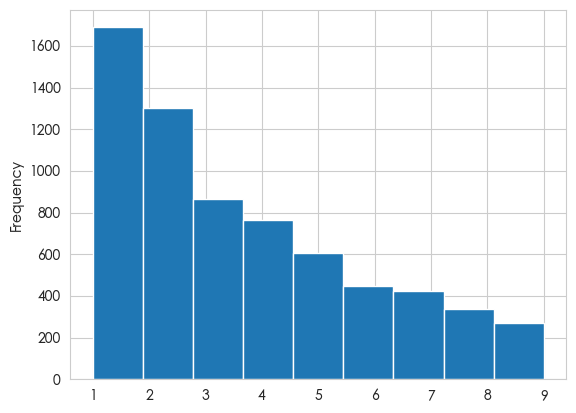

In [48]:
# 查看RF分布
rf['recency'].plot.hist(bins=9)

我从数据中观察到，数据出现了右偏分布，其中recency为1的数据占比较大，如果简单实用等规模分箱法，会导致因为同一频率会被赋予不同的分值。比如等计数分成5组，每组是20%的数据，那么recency为1的数据早已超过了20%，其中必然有一部分数据被安排给下一组，就会被赋予不同的分值。因此此处不能使用等规模分箱法。

In [49]:
recency = rf['recency'].value_counts()
recency

recency
1    1690
2    1301
3     867
4     763
5     606
6     449
7     426
8     338
9     272
Name: count, dtype: int64

针对这个问题，我采用了业务方法，根据分布情况，将：
- recency = 1 ——> 5
- recency = 2、3 ——> 4
- recency = 4、5 ——> 3
- recency = 6、7 ——> 2
- recency = 8、9 ——> 1

In [50]:
# Rscore
r_score = {1:5,2:4,3:4,4:3,5:3,6:2,7:2,8:1,9:1}
rf['r_score'] = rf['recency'].map(r_score)

<Axes: xlabel='frequency'>

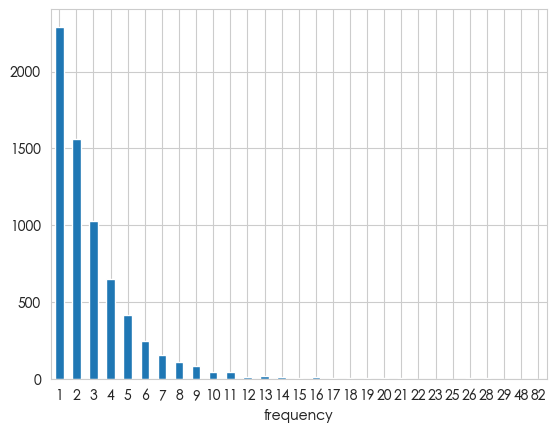

In [51]:
# 查看f分布
frequency = rf['frequency'].value_counts().reset_index()
frequency.sort_values(by='frequency', ascending=True, inplace=True)
frequency.plot.bar(x='frequency',y='count',rot=0, legend=False)

In [89]:
# 计算f score
def freq_to_score_piecewise(freq_series, low_cut=5, n_score=5):
    freq = np.sort(freq_series.unique())

    low_freq = freq[freq<=low_cut]
    high_freq = freq[freq>low_cut]

    mapping = {}
    low_score_max = max(1, n_score//2)

    low_bins = np.linspace(1, low_score_max+1, num=len(low_freq), endpoint=True)
    for v, s in zip(low_freq, np.ceil(low_bins).astype(int)):
        mapping[int(v)] = int(min(max(1,s),n_score))

    high_log = np.log1p(high_freq)
    hl_min, hl_max = high_log.min(), high_log.max()
    high_norm = (high_log - hl_min)/(hl_max - hl_min)
    target_low = low_score_max + 1
    target_high = n_score
    for v, hn in zip(high_freq, high_norm):
        sc = int(np.ceil(target_low+hn*(target_high-target_low)))
        mapping[int(v)] = sc

    return mapping


mapping = freq_to_score_piecewise(rf['frequency'], low_cut=5, n_score=5)
rf['f_score'] = rf['frequency'].map(mapping).fillna(1).astype(int)
freq_table = rf['f_score'].value_counts().sort_index().to_frame('user_count')
freq_table['pct'] = freq_table['user_count']/freq_table['user_count'].sum()
freq_table

,user_count,pct
f_score,,
1,2292,0.341478
2,2590,0.385876
3,1303,0.194130
4,519,0.077324
5,8,0.001192


In [53]:
rf['r_avg'] = rf['r_score'].mean().round(2)
rf['f_avg'] = rf['f_score'].mean().round(2)

def category(x):
    if x['r_score']>x['r_avg']:
        if x['f_score']>x['f_avg']:
            return '价值用户'
        else:
            return '发展用户'
    else:
        if x['f_score']>x['f_avg']:
            return '保持用户'
        else:
            return '挽留用户'

rf['user_cate'] = rf.apply(lambda x: category(x), axis=1)
rf.head()

,user_id,recency,frequency,r_score,f_score,r_avg,f_avg,user_cate
0,73,3,2,4,2,3.51,2.01,发展用户
1,172,6,1,2,1,3.51,2.01,挽留用户
2,245,1,7,5,4,3.51,2.01,价值用户
3,299,2,2,4,2,3.51,2.01,发展用户
4,365,1,1,5,1,3.51,2.01,发展用户


In [54]:
segments = rf['user_cate'].value_counts().reset_index()
segments

,user_cate,count
0,挽留用户,2466
1,发展用户,2416
2,价值用户,1442
3,保持用户,388


### 用户留存分析
计算用户留存率

In [55]:
user_login_date = taobao[['user_id','date']].drop_duplicates()

first_login = user_login_date.groupby('user_id')['date'].min().reset_index(name='first_login')

user_login_date['date'] = pd.to_datetime(user_login_date['date'])
first_login['first_login'] = pd.to_datetime(first_login['first_login'])

In [56]:
user_active = pd.merge(user_login_date, first_login, on='user_id', how='left')
user_active['datediff'] = (user_active['date'] - user_active['first_login']).dt.days

In [57]:
def count_rate(x, d):
    ret1 = x[x['datediff']==d]['user_id'].nunique()
    users = x['user_id'].nunique()
    return round(100*ret1/users,2)
ret1 = user_active.groupby('first_login').apply(lambda x: count_rate(x,1)).reset_index(name='ret1')
ret3 = user_active.groupby('first_login').apply(lambda x: count_rate(x,3)).reset_index(name='ret3')
retention = pd.merge(ret1, ret3, on='first_login', how='inner')
retention

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_43933/681963431.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret1 = user_active.groupby('first_login').apply(lambda x: count_rate(x,1)).reset_index(name='ret1')
/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_43933/681963431.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret3 = user_active.groupby('first_login').apply(lambda x: count_ra

,first_login,ret1,ret3
0,2017-11-25,78.37,75.71
1,2017-11-26,64.82,66.60
2,2017-11-27,62.72,69.38
3,2017-11-28,59.18,67.41
4,2017-11-29,66.86,95.35
5,2017-11-30,89.47,96.84
6,2017-12-01,100.00,0.00


In [58]:
cohort_data = user_active.groupby(['first_login', 'datediff'])['user_id'].nunique().reset_index()
# 每个 cohort 的新用户数
new_users = cohort_data[cohort_data['datediff']==0][['first_login','user_id']]
new_users.rename(columns={'user_id':'new_user_count'}, inplace=True)
cohort_data = cohort_data.merge(new_users, on='first_login', how='left')
cohort_data['retention_rate'] = round(cohort_data['user_id'] / cohort_data['new_user_count'],3)
cohort_data

,first_login,datediff,user_id,new_user_count,retention_rate
0,2017-11-25,0,7049,7049,1.000
1,2017-11-25,1,5524,7049,0.784
2,2017-11-25,2,5387,7049,0.764
3,2017-11-25,3,5337,7049,0.757
4,2017-11-25,4,5319,7049,0.755
5,2017-11-25,5,5354,7049,0.760
6,2017-11-25,6,5401,7049,0.766
7,2017-11-25,7,6955,7049,0.987
8,2017-11-25,8,6934,7049,0.984
9,2017-11-26,0,1569,1569,1.000


In [59]:
retention = pd.pivot(cohort_data, index='first_login', columns='datediff', values='retention_rate').fillna(0).drop(columns=0)
retention.columns = retention.columns.astype(str)
retention = retention.add_prefix('ret_')

<Axes: xlabel='datediff', ylabel='first_login'>

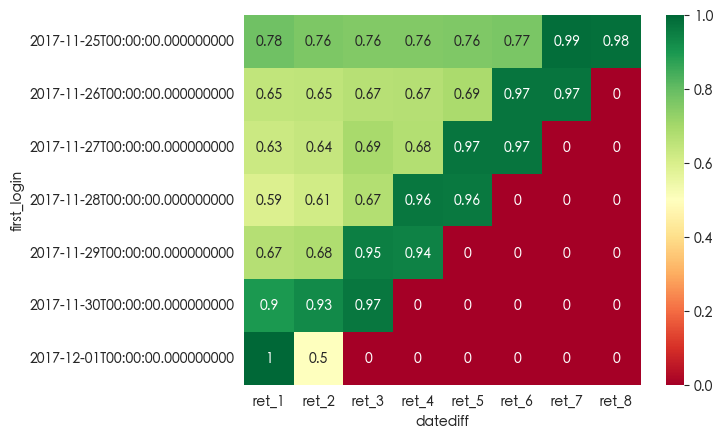

In [60]:
sns.heatmap(retention, cmap='RdYlGn',annot=True)

### 用户获取分析

In [61]:
# 计算pv, uv, pv/uv
pv_user = taobao[taobao['behavior_type']=='pv'].groupby('date').agg(
    pv = ('behavior_type', 'count'),
    uv = ('user_id', 'nunique')
).reset_index()
pv_user['pv/uv'] = round(pv_user['pv']/pv_user['uv'],2)
pv_user

,date,pv,uv,pv/uv
0,2017-11-25,93427,6863,13.61
1,2017-11-26,96894,6890,14.06
2,2017-11-27,89937,6849,13.13
3,2017-11-28,89344,6918,12.91
4,2017-11-29,90717,6934,13.08
5,2017-11-30,95178,7073,13.46
6,2017-12-01,97748,7125,13.72
7,2017-12-02,121255,9378,12.93
8,2017-12-03,123603,9353,13.22


### 商品分析

计算复购率

In [62]:
# 计算统计时间内的复购率，一天的算一单
# 筛选出所有购买记录， 根据日期和user_id进行分组
all_rebuys = taobao[taobao['behavior_type']=='buy'].groupby(['date','user_id'])['item_id'].nunique().reset_index(name='one_day')

# 根据user_id进行分组，计算不同日期均有购买的user_id
rebuy_user = all_rebuys.groupby('user_id')['date'].nunique().reset_index(name='counts')
rebuy_user['rebuy'] = np.where(rebuy_user['counts']>1,1,0)
rebuy_rate_days = rebuy_user['rebuy'].mean()
print(f"复购率: {100*rebuy_rate_days:.2f}%")

复购率: 55.48%


In [66]:
items = taobao.groupby('item_category').agg(
    pv = ('behavior_type', lambda x: (x=='pv').sum()),
    uv = ('user_id','nunique'),
    cart = ('behavior_type', lambda x: (x=='cart').sum()),
    fav = ('behavior_type', lambda x: (x=='fav').sum()),
    buy = ('behavior_type', lambda x: (x=='buy').sum())
)
items['pv/uv'] = round(items['pv']/items['uv'],2)
items['convert_buy_rate'] = round(items['buy']/items['uv'],2)
items.sort_values(by=['convert_buy_rate','pv/uv',], ascending=False, inplace=True)

In [67]:
items

,pv,uv,cart,fav,buy,pv/uv,convert_buy_rate
item_category,,,,,,,
756477,18,1,0,0,4,18.0,4.0
1521024,11,1,0,0,2,11.0,2.0
3298620,8,1,0,0,2,8.0,2.0
4139570,6,1,0,0,2,6.0,2.0
3533097,3,1,0,0,2,3.0,2.0
...,...,...,...,...,...,...,...
5016246,0,1,1,0,0,0.0,0.0
5091218,0,1,1,0,0,0.0,0.0
5093036,0,1,1,0,0,0.0,0.0


In [68]:
items_convert = taobao.groupby(['user_id','item_category']).agg(
    pv_cnt = ('behavior_type', lambda x: 1 if (x=='pv').sum()>0 else 0),
    fav_cnt = ('behavior_type', lambda x: 1 if (x=='fav').sum()>0 else 0),
    cart_cnt = ('behavior_type', lambda x: 1 if (x=='cart').sum()>0 else 0),
    buy_cnt = ('behavior_type', lambda x: 1 if (x=='buy').sum()>0 else 0)
).reset_index()
items_convert

,user_id,item_category,pv_cnt,fav_cnt,cart_cnt,buy_cnt
0,73,5064,1,0,0,0
1,73,103181,1,0,0,0
2,73,163196,1,0,0,0
3,73,405755,1,0,0,0
4,73,662846,1,0,0,0
...,...,...,...,...,...,...
241216,1017941,4482016,1,0,0,0
241217,1017941,4643350,1,0,1,0
241218,1017941,4690421,1,0,0,0
241219,1017941,4801426,1,0,1,0


In [69]:
converts_buy = items_convert.groupby('item_category').agg(
    buy_rate = ('buy_cnt', lambda x: x.mean().round(2))
).reset_index()
converts_buy.sort_values(by='buy_rate', ascending=False, inplace=True)

items = pd.merge(items, converts_buy, on='item_category', how='left').fillna(0)
items

,item_category,pv,uv,cart,fav,buy,pv/uv,convert_buy_rate,buy_rate
0,756477,18,1,0,0,4,18.0,4.0,1.0
1,1521024,11,1,0,0,2,11.0,2.0,1.0
2,3298620,8,1,0,0,2,8.0,2.0,1.0
3,4139570,6,1,0,0,2,6.0,2.0,1.0
4,3533097,3,1,0,0,2,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
5847,5016246,0,1,1,0,0,0.0,0.0,0.0
5848,5091218,0,1,1,0,0,0.0,0.0,0.0
5849,5093036,0,1,1,0,0,0.0,0.0,0.0
5850,5093750,0,1,0,1,0,0.0,0.0,0.0


In [70]:
items_scatter = items[['uv','buy_rate']]
items_scatter['uv_log'] = np.log1p(items_scatter['uv'])
items_scatter['st_uv'] = (items_scatter['uv_log'] - items_scatter['uv_log'].min())/(items_scatter['uv_log'].max() - items_scatter['uv_log'].min())

uv_mean = items_scatter['st_uv'].mean()
buy_rate_mean= items_scatter['buy_rate'].mean()

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_43933/97436603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_scatter['uv_log'] = np.log1p(items_scatter['uv'])
/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_43933/97436603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_scatter['st_uv'] = (items_scatter['uv_log'] - items_scatter['uv_log'].min())/(items_scatter['uv_log'].max() - items_scatter['uv_log'].min())


<Figure size 1000x600 with 0 Axes>

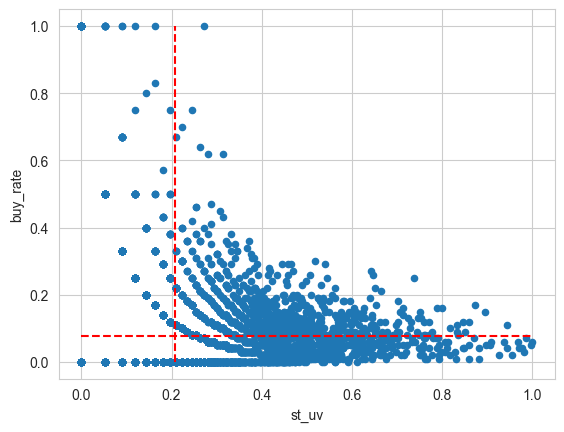

In [71]:
plt.figure(figsize=(10,6))
items_scatter.plot.scatter(x='st_uv',y='buy_rate')
plt.vlines(uv_mean, ymin=0, ymax=1, color='red', linestyles='dashed')
plt.hlines(buy_rate_mean, xmin=0, xmax=1, color='red', linestyles='dashed')